Decision Tree Implementation

Accuracy: 0.7429906542056075

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       122
           1       0.72      0.65      0.69        92

    accuracy                           0.74       214
   macro avg       0.74      0.73      0.73       214
weighted avg       0.74      0.74      0.74       214



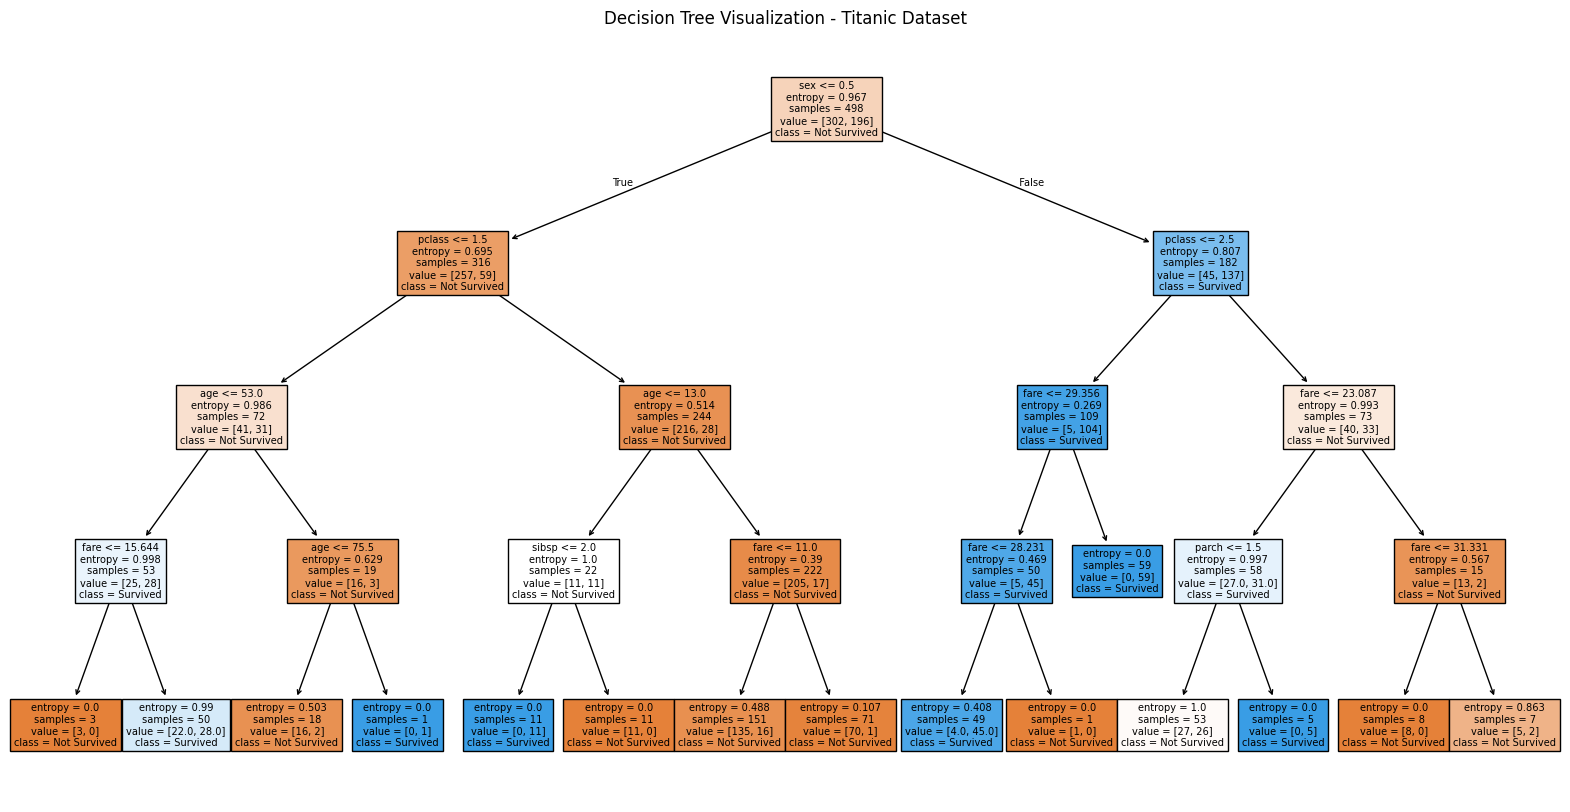

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
# Load Titanic dataset from seaborn or CSV (use seaborn if available)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Display first few rows
titanic.head()
# Select useful columns and drop rows with missing values
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()

# Convert categorical columns to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)
# Predict on test data
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree Visualization - Titanic Dataset")
plt.show()
